In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('house_price_prediction_dataset.csv')

In [4]:
data

,num_bedrooms,num_bathrooms,square_footage,lot_size,age_of_house,proximity_to_city_center,neighborhood_quality,house_price
0,4,2,855,5089,13,8,9,490699.596224
1,5,3,3424,2865,40,15,2,521249.931692
2,3,2,3115,6600,1,18,3,555975.111081
3,5,2,2916,7055,18,7,5,596433.382886
4,5,3,2551,1004,79,19,10,511950.638234
...,...,...,...,...,...,...,...,...
4995,4,2,2300,3401,67,3,3,496424.859638
4996,4,1,3199,8177,77,11,7,518662.176659
4997,5,1,2368,3006,76,10,10,536703.336723
4998,4,1,2596,2409,26,17,8,493421.827160


## Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num_bedrooms              5000 non-null   int64  
 1   num_bathrooms             5000 non-null   int64  
 2   square_footage            5000 non-null   int64  
 3   lot_size                  5000 non-null   int64  
 4   age_of_house              5000 non-null   int64  
 5   proximity_to_city_center  5000 non-null   int64  
 6   neighborhood_quality      5000 non-null   int64  
 7   house_price               5000 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num_bedrooms              5000 non-null   int64  
 1   num_bathrooms             5000 non-null   int64  
 2   square_footage            5000 non-null   int64  
 3   lot_size                  5000 non-null   int64  
 4   age_of_house              5000 non-null   int64  
 5   proximity_to_city_center  5000 non-null   int64  
 6   neighborhood_quality      5000 non-null   int64  
 7   house_price               5000 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [8]:
# Calculate the range of square footage
square_footage_min = data['square_footage'].min()
square_footage_max = data['square_footage'].max()

print(f"The range of square footage is from {square_footage_min} to {square_footage_max}")

The range of square footage is from 800 to 3499


In [9]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=['house_price', 'lot_size'], axis=1)
y = data['house_price']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [11]:
train_data = X_train.join(Y_train)

In [12]:
train_data

,num_bedrooms,num_bathrooms,square_footage,age_of_house,proximity_to_city_center,neighborhood_quality,house_price
3525,4,2,1240,35,5,10,522067.867754
2370,5,2,2230,30,1,9,628876.239164
2352,4,1,2786,36,19,10,545171.456322
1297,3,3,1602,0,14,4,529257.128795
1395,3,3,1765,50,1,7,519035.487454
...,...,...,...,...,...,...,...
3924,1,2,3080,43,8,6,418629.462699
1411,3,2,1615,58,12,4,423671.635247
787,4,1,1849,81,14,5,384110.319821
2347,1,3,1589,67,14,8,399776.557867


array([[<Axes: title={'center': 'num_bedrooms'}>,
        <Axes: title={'center': 'num_bathrooms'}>,
        <Axes: title={'center': 'square_footage'}>],
       [<Axes: title={'center': 'age_of_house'}>,
        <Axes: title={'center': 'proximity_to_city_center'}>,
        <Axes: title={'center': 'neighborhood_quality'}>],
       [<Axes: title={'center': 'house_price'}>, <Axes: >, <Axes: >]],
      dtype=object)

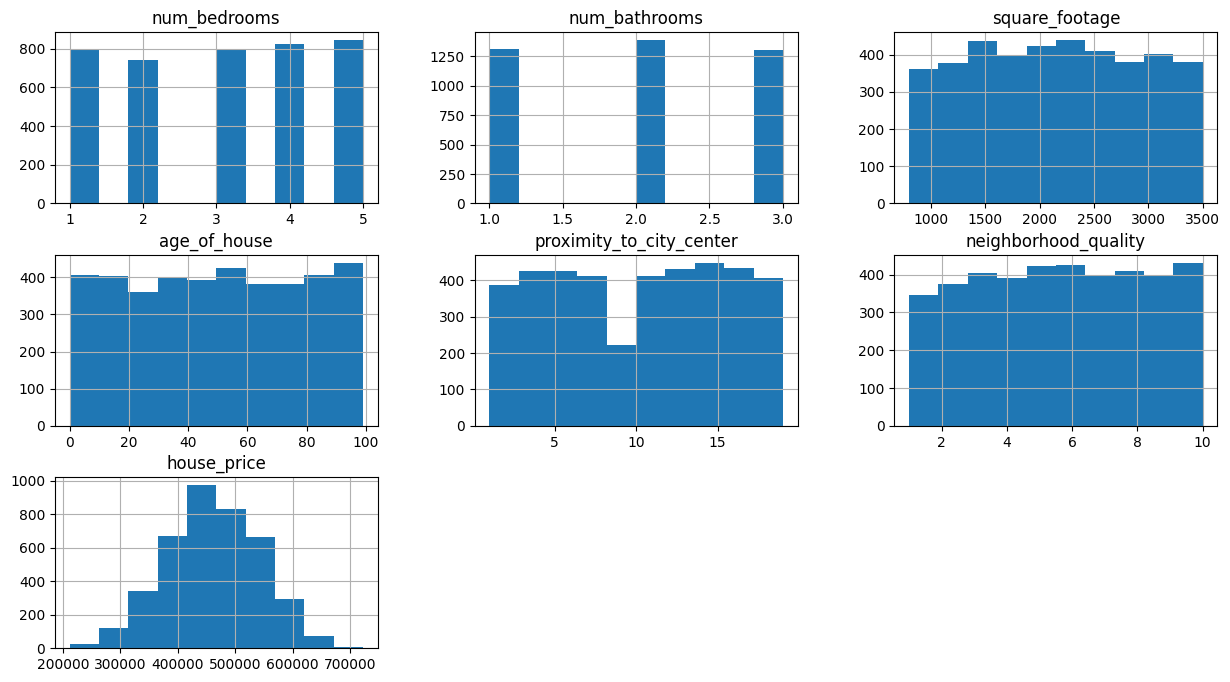

In [13]:
train_data.hist(figsize=(15, 8))

## Data Preprocessing

<Axes: >

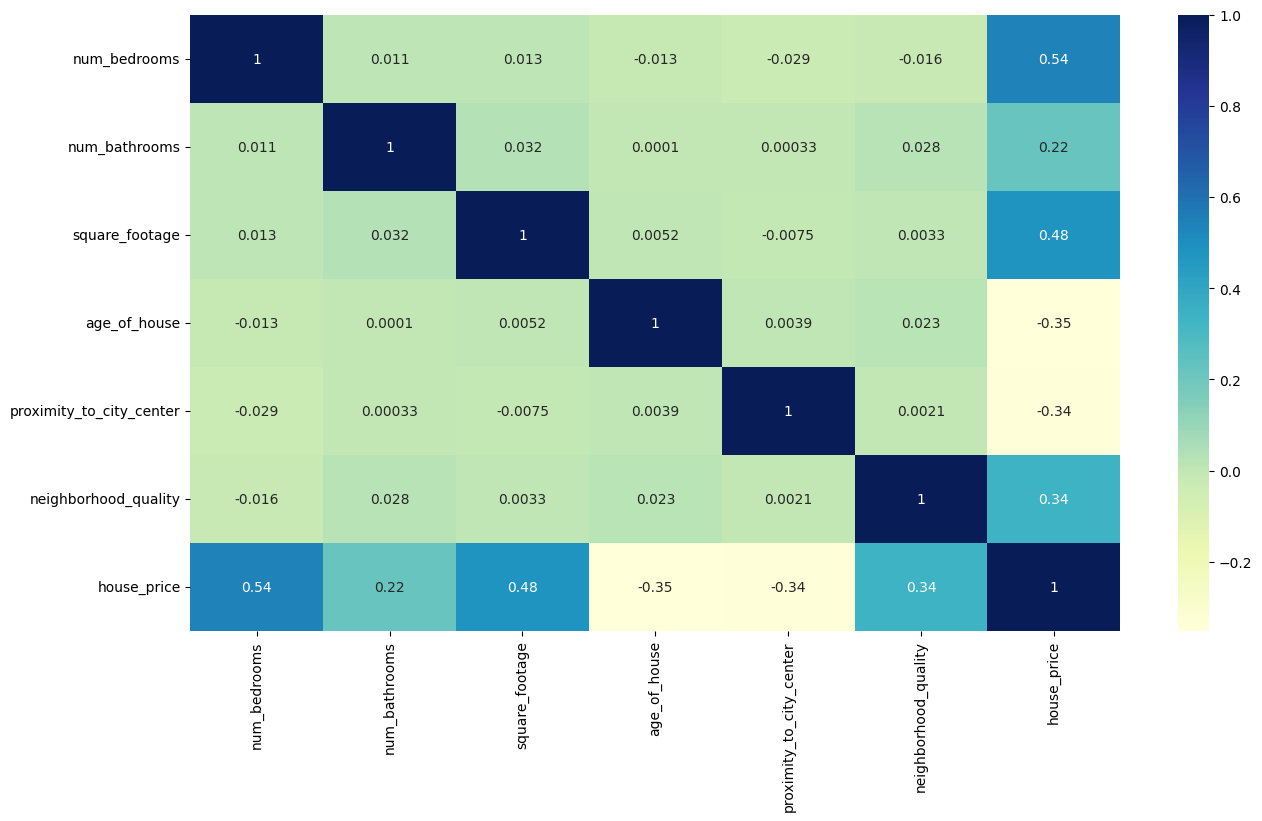

In [14]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(numeric_only = True), annot=True, cmap = "YlGnBu")

## Feature Engineering

<Axes: xlabel='square_footage', ylabel='proximity_to_city_center'>

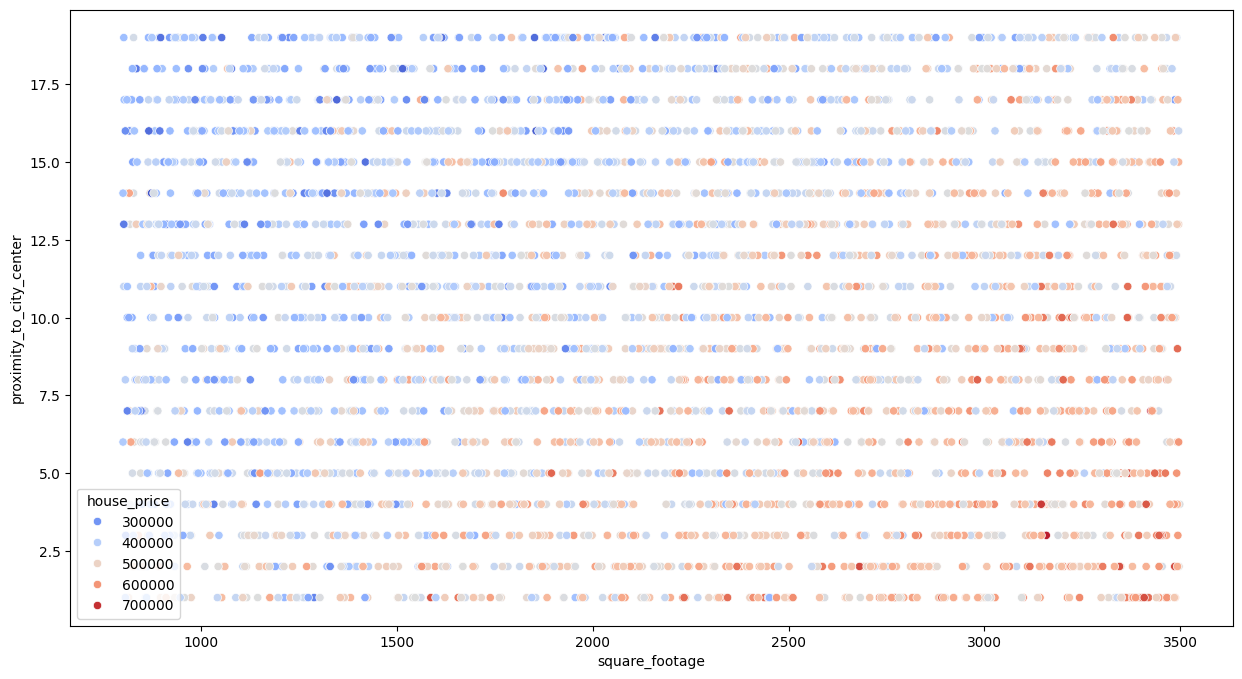

In [15]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x="square_footage", y="proximity_to_city_center", data=train_data, hue="house_price", palette="coolwarm")

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [17]:
X_test, Y_test = data.drop(columns=['house_price','lot_size'], axis=1), data['house_price']

In [18]:
reg.score(X_test, Y_test)

0.9006661560020176

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, Y_train)

RandomForestRegressor()

In [20]:
forest.score(X_test, Y_test)

0.9563543649693864

In [21]:
import joblib
joblib.dump(forest,"model.pkl")

['model.pkl']

In [22]:
X_train.columns

Index(['num_bedrooms', 'num_bathrooms', 'square_footage', 'age_of_house',
       'proximity_to_city_center', 'neighborhood_quality'],
      dtype='object')

In [23]:
pip install bz2file

Note: you may need to restart the kernel to use updated packages.


In [24]:
import bz2file as bz2
import pickle

In [28]:
# Import necessary libraries
import pandas as pd
import bz2file as bz2
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your custom dataset
data = pd.read_csv('house_price_prediction_dataset.csv')

# Assuming the target variable is named 'house_price' and it's in the last column
X = data.drop(columns=['house_price','lot_size'], axis=1)
y = data['house_price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define compression and decompression functions
def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f:
        pickle.dump(data, f)

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = pickle.load(data)
    return data

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Compress and save the model
compressed_pickle('model', model)

# Load the compressed model
model = decompress_pickle('model.pbz2')

# Use the model for prediction
predictions = model.predict(X_test)

# Print predictions
print(predictions)

[518807.56642407 426422.52928282 603698.38559711 411964.93182956
 507734.04809317 434310.70707725 386905.42310361 568792.6239921
 376591.59306127 517125.69524827 533779.49818803 402990.87182427
 572604.54766992 451734.7979687  463379.39184318 459573.1203526
 381887.19051388 531291.55139813 358249.51998649 391652.30763526
 506707.85762143 517044.91651287 569826.65613073 510505.1883104
 346884.45485038 385039.90096573 363485.032414   437908.43356307
 358393.54563618 426530.28424186 558911.60647694 408231.9598711
 582465.5040639  388633.44495031 401926.87577243 412540.48627641
 500592.57046345 441369.8363567  539485.38505024 484334.36268621
 592695.35911574 489628.33175121 438646.98490506 595167.95638792
 507626.92556508 420521.15917648 484186.8826822  466530.09169677
 358621.35212589 535420.06970713 328013.12000238 492737.00944966
 507736.27753284 421864.41554741 581922.66544135 332528.72907753
 511636.91258215 423736.42916433 410403.38819198 473298.47440467
 459974.75836011 584496.68442